Projekt MNwS - Aleksander Folfas 411052

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

Zadanie 13

Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej w teście
Kołmogorowa-Smirnowa w przypadku, gdy rozważane próbki pochodzą z tego samego rozkładu.
Rozważyć dwa różne rozkłady asymetryczne. W badaniu uwzględnić różną liczebność próbek.
Uzyskane wyniki należy przedstawić na odpowiednich wykresach ilustrujących wyniki z
uwzględnieniem:
- liczby danych (można rozważać różne liczebności w każdej z próbek),
- parametrów rozważanych rozkładów.

C:\Users\alekf\AppData\Local\Temp\ipykernel_16496\2272209901.py:13: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  result = ks_2samp(sample1, sample2)


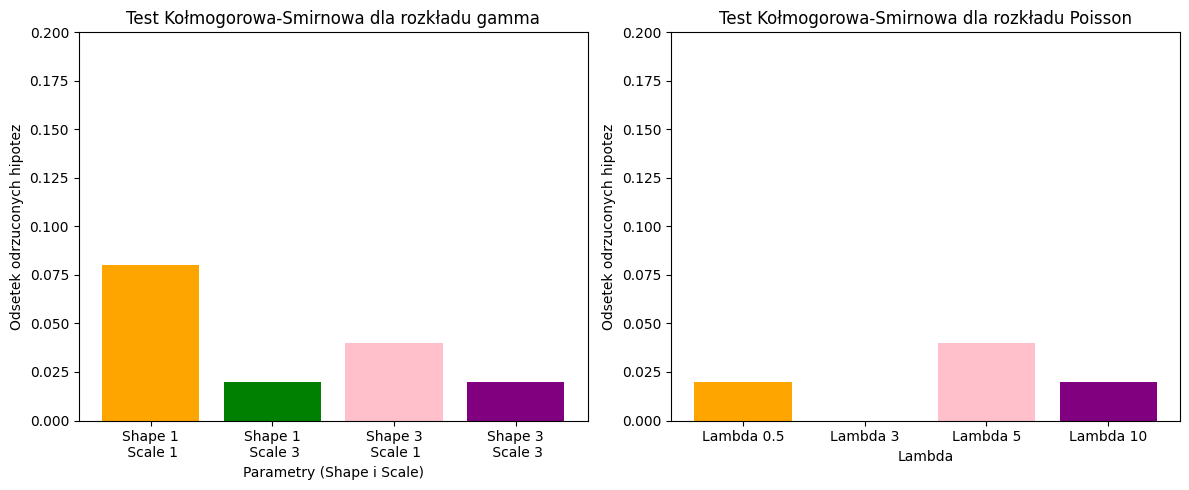

In [145]:
# Ziarno generatora liczb pseudolosowych
np.random.seed(411052)
# Funkcja generująca próbki z rozkładu gamma
def generate_gamma_samples(shape, scale, size):
    return np.random.gamma(shape, scale, size)

# Funkcja generująca próbki z rozkładu Poisson
def generate_poisson_samples(lam, size):
    return np.random.poisson(lam, size)

# Funkcja wykonująca test Kołmogorowa-Smirnowa i zwracająca wynik
def run_ks_test(sample1, sample2):
    result = ks_2samp(sample1, sample2)
    return result.statistic, result.pvalue

# Parametry rozkładów gamma
gamma_shapes = [1, 3]
gamma_scales = [1, 3]

# Parametry rozkładu Poisson
poisson_lambdas = [0.5, 3, 5, 10]

# Liczebność próbek
sample_sizes = np.arange(1, 100, 2)

# Inicjalizacja list wyników
results_gamma = []
results_poisson = []

# Generowanie próbek, wykonywanie testu i zapisywanie wyników dla rozkładu gamma
for gamma_shape in gamma_shapes:
    for gamma_scale in gamma_scales:
        results_gamma_row = []
        
        for sample_size in sample_sizes:
            # Generowanie próbek z rozkładu gamma
            gamma_samples1 = generate_gamma_samples(gamma_shape, gamma_scale, sample_size)
            gamma_samples2 = generate_gamma_samples(gamma_shape, gamma_scale, sample_size)
            
            # Wykonywanie testu Kołmogorowa-Smirnowa
            ks_statistic, p_value = run_ks_test(gamma_samples1, gamma_samples2)
            reject_h0 = int(p_value < 0.05)  # 0 - H0 nieodrzucona, 1 - H0 odrzucona
            results_gamma_row.append(reject_h0)
        
        rate = sum(results_gamma_row) / len(results_gamma_row)
        results_gamma.append(rate)

# Generowanie próbek, wykonywanie testu i zapisywanie wyników dla rozkładu Poisson
for poisson_lambda in poisson_lambdas:
    results_poisson_row = []
    
    for sample_size in sample_sizes:
        # Generowanie próbek z rozkładu Poisson
        poisson_samples1 = generate_poisson_samples(poisson_lambda, sample_size)
        poisson_samples2 = generate_poisson_samples(poisson_lambda, sample_size)
        
        # Wykonywanie testu Kołmogorowa-Smirnowa
        ks_statistic, p_value = run_ks_test(poisson_samples1, poisson_samples2)
        reject_h0 = int(p_value < 0.05)  # 0 - H0 nieodrzucona, 1 - H0 odrzucona
        results_poisson_row.append(reject_h0)
    rate = sum(results_poisson_row) / len(results_poisson_row)
    results_poisson.append(rate)


# Wykres dla rozkładu gamma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors_gamma = ['orange', 'green', 'pink', 'purple']  # Lista kolorów dla rozkładu gamma

for i in range(len(gamma_shapes)):
    for j in range(len(gamma_scales)):
        ax1.bar(i * len(gamma_scales) + j, results_gamma[i * len(gamma_scales) + j], color=colors_gamma[i * len(gamma_scales) + j])
ax1.set_xticks(range(len(results_gamma)))
ax1.set_xticklabels([f'Shape {gamma_shapes[i]}\n Scale {gamma_scales[j]}' for i in range(len(gamma_shapes)) for j in range(len(gamma_scales))])
ax1.set_ylim(0, 0.2)
ax1.set_xlabel('Parametry (Shape i Scale)')
ax1.set_ylabel('Odsetek odrzuconych hipotez')
ax1.set_title('Test Kołmogorowa-Smirnowa dla rozkładu gamma')

# Wykres dla rozkładu Poisson
colors_poisson = ['orange', 'green', 'pink', 'purple']   # Lista kolorów dla rozkładu Poisson

for i in range(len(poisson_lambdas)):
    ax2.bar(i, results_poisson[i], color=colors_poisson[i])
ax2.set_xticks(range(len(results_poisson)))
ax2.set_ylim(0, 0.2)
ax2.set_xticklabels([f'Lambda {poisson_lambdas[i]}' for i in range(len(poisson_lambdas))])
ax2.set_xlabel('Lambda')
ax2.set_ylabel('Odsetek odrzuconych hipotez')
ax2.set_title('Test Kołmogorowa-Smirnowa dla rozkładu Poisson')

plt.tight_layout()
plt.show()
